# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:

     While the effectiveness of Capomulin seems to be comparable to Ramicane, it is significantly more effective than Infubinol and Ceftamine (based on the box plots of the final tumor volumes)
     
    # The linear regression plot shows a definate positive relationship between weight and drug effectiveness. The heavier the mouse, the minimal possibility of drug effectiveness. 
    # This Data seems to be very reliable since there is only one outlier.
    # It seems that ceftamin & capomulin are the most effective drugs in the box plot.

SyntaxError: invalid syntax (2732709546.py, line 1)

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_Mouse_Data = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID') 
#df_Mouse_Data = df_Mouse_Data1.set_index(keys='Mouse ID')
# Display the data table for preview
df_Mouse_Data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [ ]:
# Checking the number of mice.
print(len(mouse_metadata))

249


In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# The Following Website was used for reference for the Duplicate Function. 
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

df_Mouse_Data[df_Mouse_Data.duplicated()]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
df_Mouse_Data[df_Mouse_Data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df_Clean_Mouse_Data = df_Mouse_Data[df_Mouse_Data["Mouse ID"] != 'g989']

In [ ]:
# Checking the number of mice in the clean DataFrame.
len(df_Clean_Mouse_Data['Mouse ID'].unique())

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Mean = df_Clean_Mouse_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Median = df_Clean_Mouse_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

Variance = df_Clean_Mouse_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

Stdev = df_Clean_Mouse_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

Std_Error_Mean = df_Clean_Mouse_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Drug_Regimen_Tumor_summary = pd.DataFrame({
    "Tumor Volume Mean": Mean,
    "Tumor Volume Median": Median,
    "Tumor Volume Variance": Variance,
    "Tumor Volume Standard deviation": Stdev,
    "Standard Error Mean": Std_Error_Mean
})

Drug_Regimen_Tumor_summary



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
Tumor_Descriptives = df_Clean_Mouse_Data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


Tumor_Descriptives

# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

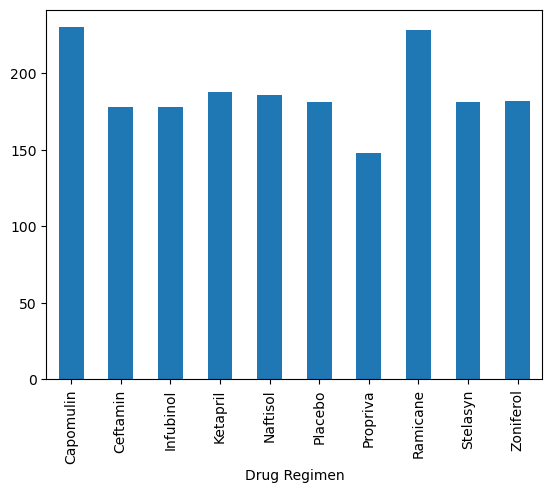

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse_Count_byRegiment = df_Clean_Mouse_Data.groupby('Drug Regimen')['Mouse ID'].count()

#print(Mouse_Count_byRegiment)

Mouse_Count_byRegiment.plot.bar()

plt.show()





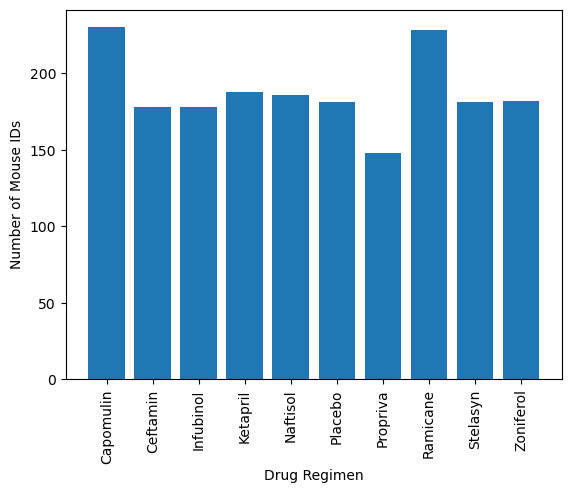

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(Mouse_Count_byRegiment.index, Mouse_Count_byRegiment.values)

plt.ylabel('Number of Mouse IDs', size=10) 
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')

plt.show()







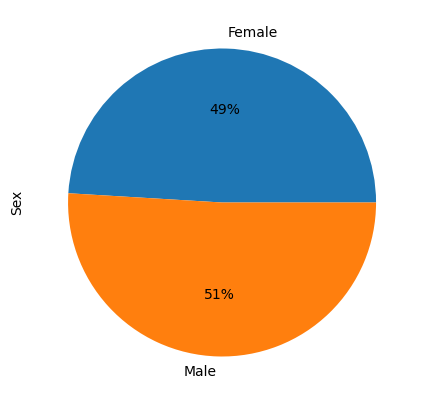

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mouse_Gender = df_Clean_Mouse_Data.groupby(['Sex'])['Sex'].count()


Plot = Mouse_Gender.plot.pie(y='Sex',autopct='%1.0f%%', figsize=(5, 5))



#Mouse_Gender.plot.pie( )

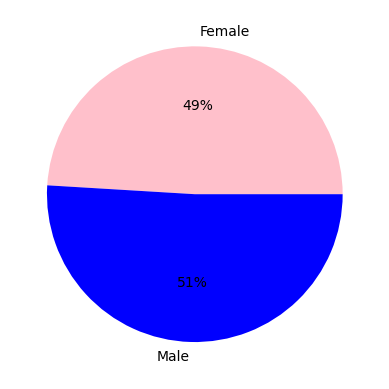

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#print(Mouse_Gender)

labels = ["Female", "Male"]

Sizes  = [922, 958]

colors = ["Pink", "Blue"]

plot = plt.pie(Sizes, labels=labels, colors=colors, autopct='%1.0f%%')  

plt.show()





## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Max_Tumor_Size = df_Clean_Mouse_Data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].max()

print(Max_Tumor_Size.head())

# Start by getting the last (greatest) timepoint for each mouse

Max_Timepoint = df_Clean_Mouse_Data.groupby(['Mouse ID'])['Timepoint'].max()

#Must create a Dataframe before merging it to another one. 

Max_Timepoint = pd.DataFrame(Max_Timepoint)

Max_Timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Max_Tumor_Timepoint_df = pd.merge(Max_Timepoint, df_Clean_Mouse_Data, on=('Mouse ID','Timepoint'), how='left')

len(Max_Tumor_Timepoint_df)

Drug Regimen
Capomulin    48.158209
Ceftamin     68.923185
Infubinol    72.226731
Ketapril     78.567014
Naftisol     76.668817
Name: Tumor Volume (mm3), dtype: float64


248

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = Max_Tumor_Timepoint_df['Drug Regimen'].unique()

#print(Treatments)
# Create empty list to fill with tumor vol data (for plotting)

Cap_Tumor = []
Ket_Tumor = []
Naf_Tumor = []
Inf_Tumor = []
Ste_Tumor = []
Ram_Tumor = []
Zon_Tumor = []
Pro_Tumor = []
Pla_Tumor = []
Cef_Tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
Inf = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Inf_Tumor = Inf.reset_index(drop=True)

Pla = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Placebo']['Tumor Volume (mm3)']
Pla_Tumor = Pla.reset_index(drop=True)

Cef = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
Cef_Tumor = Cef.reset_index(drop=True)

Zon = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Zoniferol']['Tumor Volume (mm3)']
Zon_Tumor = Zon.reset_index(drop=True)

Ram = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Ram_Tumor = Ram.reset_index(drop=True)

Ket = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Ketapril']['Tumor Volume (mm3)']
Ket_Tumor = Ket.reset_index(drop=True)

Naf = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Naftisol']['Tumor Volume (mm3)']
Naf_Tumor = Naf.reset_index(drop=True)

Cap = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
Cap_Tumor = Cap.reset_index(drop=True)

Pro = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Propriva']['Tumor Volume (mm3)']
Pro_Tumor = Pro.reset_index(drop=True)

Ste = Max_Tumor_Timepoint_df[Max_Tumor_Timepoint_df['Drug Regimen'] == 'Stelasyn']['Tumor Volume (mm3)']
Ste_Tumor = Ste.reset_index(drop=True)



 #For Some reason Propriva and Stelasyn had 24 Rows instead of the standard 25 for this reason I was not able to putforth a Data frame
 #with these two Drug Regimens; So i created another one for Outlier Analysis
 # Print statement Below is proof

#print(Max_Tumor_Timepoint_df['Drug Regimen'].value_counts())

    # add subset 
Drug_Regimen_Data = pd.DataFrame({
    "Infubinol": Inf_Tumor,
    "Ketapril": Ket_Tumor,
    "Naftisol": Naf_Tumor,
    "Placebo": Pla_Tumor,
    "Ceftamin": Cef_Tumor,
    "Zoniferol": Zon_Tumor,
    "Ramicane": Ram_Tumor,
    "Capomulin": Cap_Tumor})

Drug_Regimen_Data1 = pd.DataFrame({
    "Propriva": Pro_Tumor,
    "Stelasyn": Ste_Tumor,})

# Determine outliers using upper and lower bounds

# For some reason the quartiles function featureed in the activities was not working.
#  I was able to calculate by dropping indexes


Quartile1 = Drug_Regimen_Data.quantile([.25])
Quartile2 = Drug_Regimen_Data.quantile([.75])

Q1 = Quartile1.reset_index(drop=True)

Q2 = Quartile2.reset_index(drop=True)

IQR = Q2 - Q1

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q2 + (1.5*IQR)


Quartile1_v1 = Drug_Regimen_Data1.quantile([.25])
Quartile2_v1 = Drug_Regimen_Data1.quantile([.75])

Q1_v1 = Quartile1_v1.reset_index(drop=True)

Q2_v1 = Quartile2_v1.reset_index(drop=True)

IQR_v1 = Q2_v1 - Q1_v1

lower_bound_v1 = Q1_v1 - (1.5*IQR_v1)
upper_bound_v1 = Q2_v1 + (1.5*IQR_v1)


print(f"The Following Values Below this Threshold are Outliers")

print(lower_bound.head())

print(lower_bound_v1.head())


print(f"The Following Values Beyond this Threshold are Outliers")

print(upper_bound.head())

print(upper_bound_v1.head())




The Following Values Below this Threshold are Outliers
   Infubinol   Ketapril   Naftisol    Placebo  Ceftamin  Zoniferol   Ramicane  \
0  36.832905  36.991862  25.853344  30.155822  25.35545  24.779522  17.912664   

   Capomulin  
0  20.704562  
    Propriva   Stelasyn
0  28.765296  27.535572
The Following Values Beyond this Threshold are Outliers
   Infubinol   Ketapril   Naftisol    Placebo   Ceftamin  Zoniferol  \
0  82.741446  89.600484  95.789787  90.921368  87.666458  92.002936   

    Ramicane  Capomulin  
0  54.306811  51.832015  
    Propriva   Stelasyn
0  83.043811  94.044968


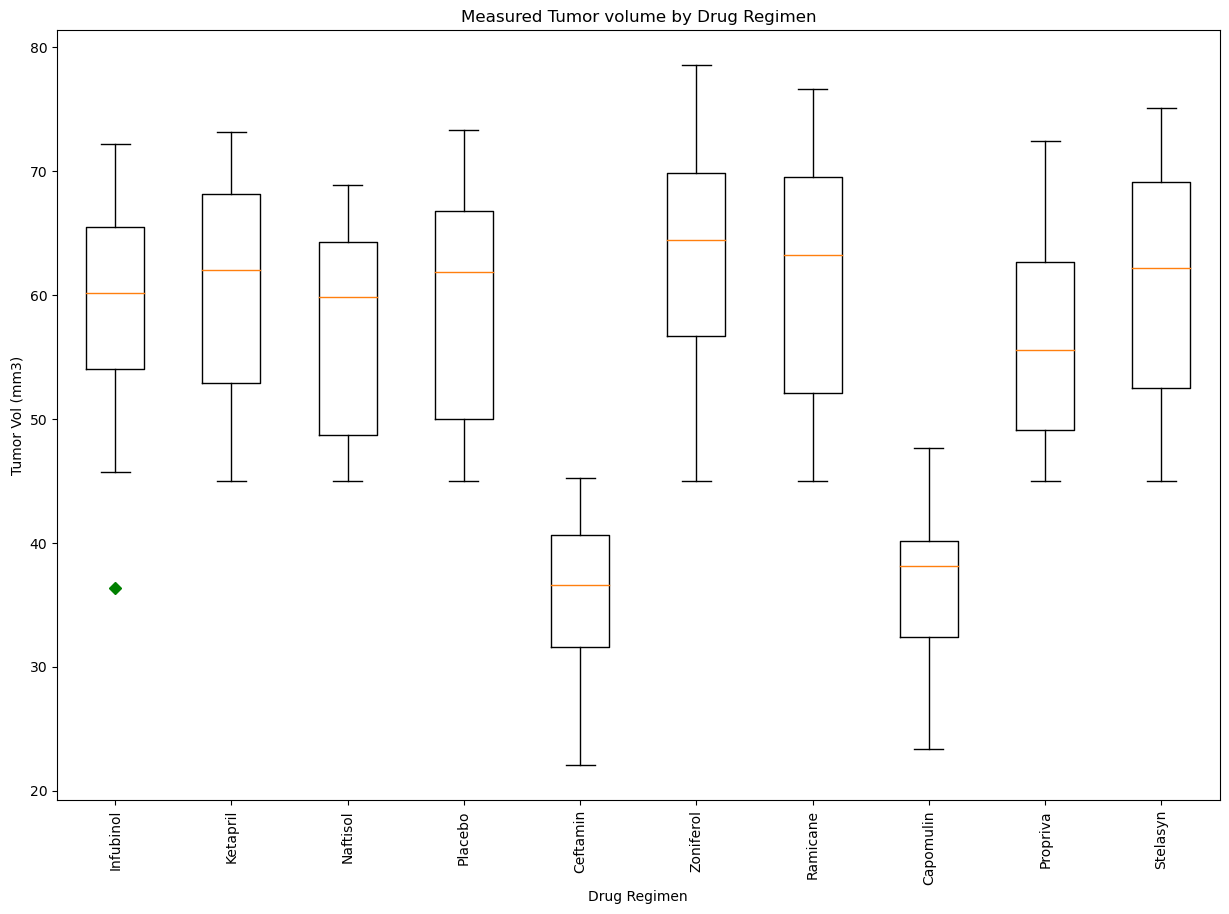

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


boxplot_list = [Drug_Regimen_Data['Infubinol'],
                Drug_Regimen_Data['Placebo'],
                Drug_Regimen_Data['Ceftamin'],
                Drug_Regimen_Data['Zoniferol'],
                Drug_Regimen_Data['Ramicane'],
                Drug_Regimen_Data['Ketapril'],
                Drug_Regimen_Data['Naftisol'],
                Drug_Regimen_Data['Capomulin'],
                                    Pro_Tumor,
                                    Ste_Tumor]


# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(15,10))
ax.set_title('Measured Tumor volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)') 
labels = ["Infubinol", "Ketapril", "Naftisol", "Placebo", "Ceftamin", "Zoniferol", "Ramicane", "Capomulin", "Propriva", "Stelasyn"]

ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4,5,6,7,8,9,10], labels=labels, rotation='vertical') 
plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

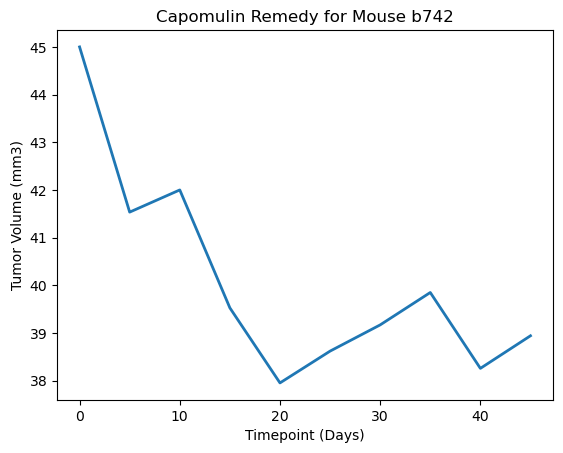

In [ ]:


# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_Clean_Mouse_Data.head()

# Listing Mouses...
#Capomulin_Mouse = df_Clean_Mouse_Data.loc[df_Clean_Mouse_Data['Drug Regimen'] == "Capomulin",:]
#print(Capomulin_Mouse)


One_Mouse = df_Clean_Mouse_Data.loc[df_Clean_Mouse_Data['Mouse ID'] == "b742",:] 
Individual_Mouse = One_Mouse.reset_index(drop=True)

X_Axis = Individual_Mouse['Timepoint']

Y_Axis_Tumor = Individual_Mouse['Tumor Volume (mm3)']

plt.title('Capomulin Remedy for Mouse b742') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(X_Axis, Y_Axis_Tumor,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()







C:\Users\Erick\AppData\Local\Temp\ipykernel_1424\34395088.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Cap_Mouse_Avg = Capomulin_Mouse.groupby(['Mouse ID']).mean()


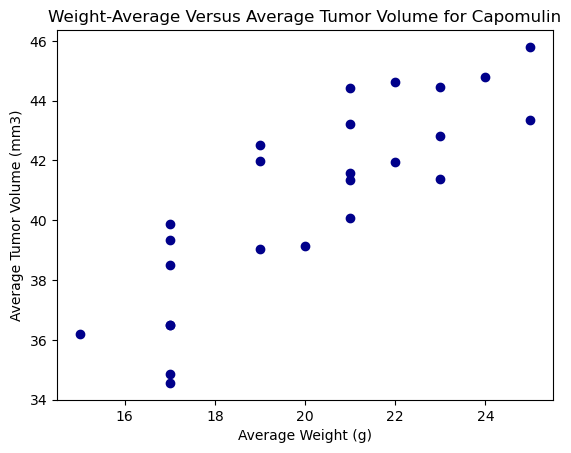

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Cap_Mouse = df_Clean_Mouse_Data.loc[df_Clean_Mouse_Data['Drug Regimen'] == "Capomulin",:] 
Capomulin_Mouse = Cap_Mouse.reset_index(drop=True)

Cap_Mouse_Avg = Capomulin_Mouse.groupby(['Mouse ID']).mean()


X_Axis_Weight_Avg = Cap_Mouse_Avg['Weight (g)']

Y_Axis_Tumor_Avg = Cap_Mouse_Avg['Tumor Volume (mm3)']

plt.scatter(X_Axis_Weight_Avg, Y_Axis_Tumor_Avg, color = "darkblue")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight-Average Versus Average Tumor Volume for Capomulin")

plt.savefig('Scatter')
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f' The correlation coefficient between weight and tumor volume is {round(st.pearsonr(X_Axis_Weight_Avg, Y_Axis_Tumor_Avg)[0],2)}') 

linear_representation = st.linregress(X_Axis_Weight_Avg, Y_Axis_Tumor_Avg)
linear_representation


#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept


 The correlation coefficient between weight and tumor volume is 0.84


LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

y = 0.95x + 21.55


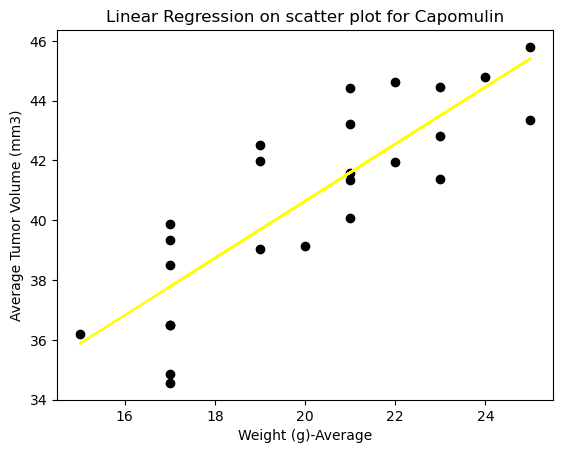

In [ ]:
slope, intercept, r_value , p_value, std_err = st.linregress(X_Axis_Weight_Avg, Y_Axis_Tumor_Avg)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = X_Axis_Weight_Avg * slope + intercept

print(line_eq)

plt.scatter(X_Axis_Weight_Avg, Y_Axis_Tumor_Avg, color = "black")
plt.plot(X_Axis_Weight_Avg, regress_values, color = "yellow")
plt.xlabel("Weight (g)-Average")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression on scatter plot for Capomulin")
plt.savefig('Regression-Line')

plt.show()